In [12]:
import nasdaqdatalink as ndl
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np

In [13]:
t_data = ndl.get("WIKI/T")
tm_data = ndl.get("WIKI/TMUS")
vz_data = ndl.get("WIKI/VZ")
t_data.to_csv("T.csv")
tm_data.to_csv("TMUS.csv")
vz_data.to_csv("VZ.csv")

In [14]:
# splits a column of dates in the format YYYY-MM-DD into three columns in the formats YYYY, MM, and DD
def splitDates(df):
    # splitting the values in the Date column
    dates = df['Date'].str.split("-")
    df['Date'] = dates
    
    # Iterating through the dates, putting years, months, and days in their respective lists
    yearList = []
    monthList = []
    dayList = []
    for date in dates:
        yearList.append(int(date[0]))
        monthList.append(int(date[1]))
        dayList.append(int(date[2]))
    # Converting the lists to Series
    years = pd.Series(yearList)
    months = pd.Series(monthList)
    days = pd.Series(dayList)
    # Dropping the old Date column
    df = df.drop(columns="Date")
    # Adding the new columns
    df['Year'] = years
    df['Month'] = months
    df['Day'] = days
    
    # moving the date back to the front of the dataframe
    cols = df.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    cols = cols[-1:] + cols[:-1]
    cols = cols[-1:] + cols[:-1]
    df = df[cols]
    return df

# AT&T

In [64]:
att_data = pd.read_csv("T.csv")
att_data.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,1984-07-19,59.75,59.87,59.38,59.38,77900.0,0.0,1.0,1.275248,1.277809,1.267351,1.267351,934800.0
1,1984-07-20,59.62,60.00,59.25,59.50,129800.0,0.0,1.0,1.272474,1.280584,1.264577,1.269913,1557600.0
2,1984-07-23,59.25,59.75,58.75,59.50,276100.0,0.0,1.0,1.264577,1.275248,1.253905,1.269913,3313200.0
3,1984-07-24,59.75,60.38,59.62,60.00,129100.0,0.0,1.0,1.275248,1.288694,1.272474,1.280584,1549200.0
4,1984-07-25,60.00,61.37,59.87,60.75,152400.0,0.0,1.0,1.280584,1.309824,1.277809,1.296591,1828800.0


In [65]:
att_data['Daily Change'] = att_data['Close'] - att_data['Open']
att_data['Percent Daily Change'] = att_data['Daily Change'] / att_data['Open'] * 100
att_data.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Change,Percent Daily Change
0,1984-07-19,59.75,59.87,59.38,59.38,77900.0,0.0,1.0,1.275248,1.277809,1.267351,1.267351,934800.0,-0.37,-0.619247
1,1984-07-20,59.62,60.00,59.25,59.50,129800.0,0.0,1.0,1.272474,1.280584,1.264577,1.269913,1557600.0,-0.12,-0.201275
2,1984-07-23,59.25,59.75,58.75,59.50,276100.0,0.0,1.0,1.264577,1.275248,1.253905,1.269913,3313200.0,0.25,0.421941
3,1984-07-24,59.75,60.38,59.62,60.00,129100.0,0.0,1.0,1.275248,1.288694,1.272474,1.280584,1549200.0,0.25,0.418410
4,1984-07-25,60.00,61.37,59.87,60.75,152400.0,0.0,1.0,1.280584,1.309824,1.277809,1.296591,1828800.0,0.75,1.250000


In [17]:
att_split = splitDates(att_data)
att_split.head()

,Year,Month,Day,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Change,Percent Daily Change
0,1984,7,19,59.75,59.87,59.38,59.38,77900.0,0.0,1.0,1.275248,1.277809,1.267351,1.267351,934800.0,-0.37,-0.619247
1,1984,7,20,59.62,60.00,59.25,59.50,129800.0,0.0,1.0,1.272474,1.280584,1.264577,1.269913,1557600.0,-0.12,-0.201275
2,1984,7,23,59.25,59.75,58.75,59.50,276100.0,0.0,1.0,1.264577,1.275248,1.253905,1.269913,3313200.0,0.25,0.421941
3,1984,7,24,59.75,60.38,59.62,60.00,129100.0,0.0,1.0,1.275248,1.288694,1.272474,1.280584,1549200.0,0.25,0.418410
4,1984,7,25,60.00,61.37,59.87,60.75,152400.0,0.0,1.0,1.280584,1.309824,1.277809,1.296591,1828800.0,0.75,1.250000


Notice the spike in volume in 1988 in the following plot. 

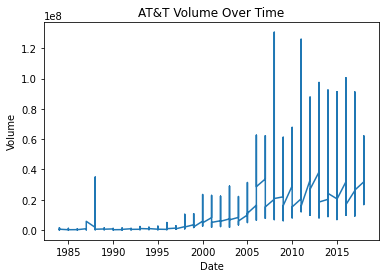

In [35]:
plt.plot(att_split["Year"], att_split['Volume'])
plt.title("AT&T Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

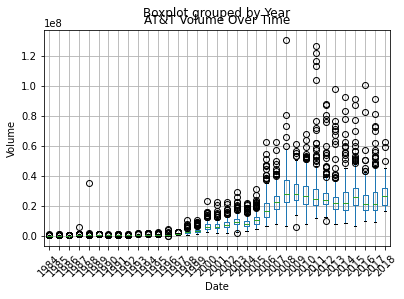

In [71]:
att_split.boxplot("Volume", by="Year")
plt.title("AT&T Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.xticks(rotation=90)
plt.show()

In [26]:
att_1988 = ndl.get("WIKI/T", start_date="1988-01-01", end_date="1995-12-31")
att_1988.to_csv('att_1988.csv')
att_1988 = pd.read_csv("att_1988.csv")
att_1988_split = splitDates(att_1988)
att_1988_split

Notice the five-year rise in closing prices for AT&T that followed 1988. 

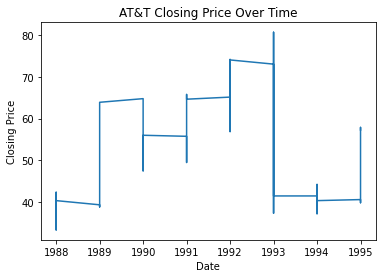

In [36]:
plt.plot(att_1988_split["Year"], att_1988_split['Close'])
plt.title("AT&T Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

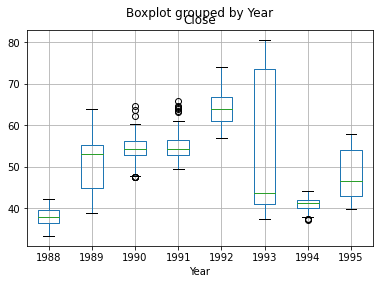

In [69]:
att_1988_split.boxplot("Close", by="Year")

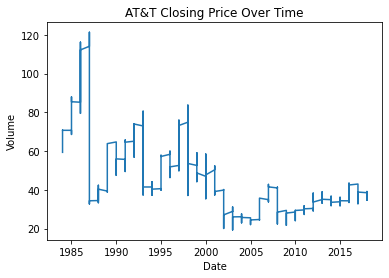

In [33]:
plt.plot(att_split["Year"], att_split['Close'])
plt.title("AT&T Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

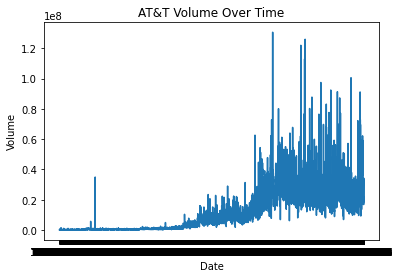

In [21]:
plt.plot(att_data["Date"], att_data['Volume'])
plt.title("AT&T Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

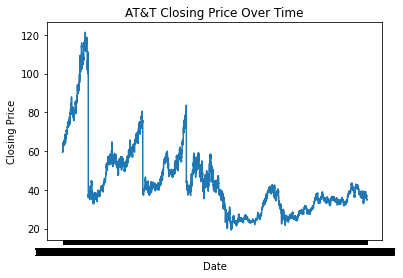

In [13]:
plt.plot(att_data["Date"], att_data['Close'])
plt.title("AT&T Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

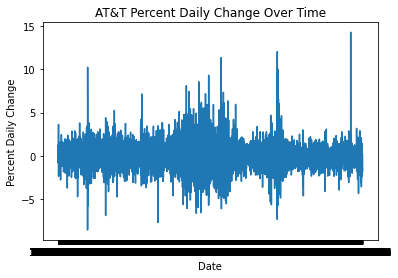

In [66]:
plt.plot(att_data['Date'], att_data['Percent Daily Change'])
plt.title("AT&T Percent Daily Change Over Time")
plt.xlabel("Date")
plt.ylabel("Percent Daily Change")
plt.show()

# T-Mobile

In [60]:
tmobile_data = pd.read_csv("TMUS.csv")
tmobile_data.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2007-04-19,25.10,27.61,24.50,27.40,31724800.0,0.0,1.0,33.684159,37.052575,32.878960,36.770755,15862400.0
1,2007-04-20,27.40,28.80,27.10,28.55,6109400.0,0.0,1.0,36.770755,38.649553,36.368156,38.314054,3054700.0
2,2007-04-23,28.60,28.94,28.29,28.75,3752800.0,0.0,1.0,38.381154,38.837433,37.965134,38.582453,1876400.0
3,2007-04-24,28.51,29.40,28.51,29.20,3065800.0,0.0,1.0,38.260374,39.454752,38.260374,39.186353,1532900.0
4,2007-04-25,29.55,29.75,28.51,28.61,2450600.0,0.0,1.0,39.656052,39.924452,38.260374,38.394574,1225300.0


In [61]:
tmobile_data['Daily Change'] = tmobile_data['Close'] - tmobile_data['Open']
tmobile_data['Percent Daily Change'] = tmobile_data['Daily Change'] / tmobile_data['Open'] * 100
tmobile_data.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Change,Percent Daily Change
0,2007-04-19,25.10,27.61,24.50,27.40,31724800.0,0.0,1.0,33.684159,37.052575,32.878960,36.770755,15862400.0,2.30,9.163347
1,2007-04-20,27.40,28.80,27.10,28.55,6109400.0,0.0,1.0,36.770755,38.649553,36.368156,38.314054,3054700.0,1.15,4.197080
2,2007-04-23,28.60,28.94,28.29,28.75,3752800.0,0.0,1.0,38.381154,38.837433,37.965134,38.582453,1876400.0,0.15,0.524476
3,2007-04-24,28.51,29.40,28.51,29.20,3065800.0,0.0,1.0,38.260374,39.454752,38.260374,39.186353,1532900.0,0.69,2.420203
4,2007-04-25,29.55,29.75,28.51,28.61,2450600.0,0.0,1.0,39.656052,39.924452,38.260374,38.394574,1225300.0,-0.94,-3.181049


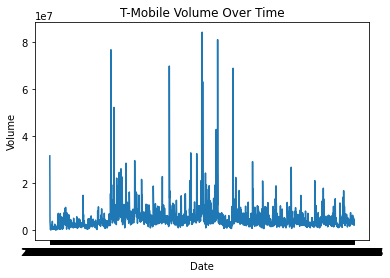

In [40]:
plt.plot(tmobile_data["Date"], tmobile_data["Volume"])
plt.title("T-Mobile Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

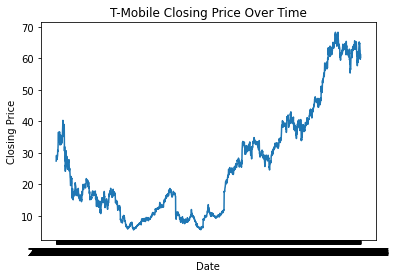

In [10]:
plt.plot(tmobile_data["Date"], tmobile_data["Close"])
plt.title("T-Mobile Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

In [41]:
tmobile_split = splitDates(tmobile_data)
tmobile_split

,Year,Month,Day,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Change,Percent Daily Change
0,2007,4,19,25.10,27.610,24.50,27.40,31724800.0,0.0,1.0,33.684159,37.052575,32.878960,36.770755,15862400.0,2.30,9.163347
1,2007,4,20,27.40,28.800,27.10,28.55,6109400.0,0.0,1.0,36.770755,38.649553,36.368156,38.314054,3054700.0,1.15,4.197080
2,2007,4,23,28.60,28.940,28.29,28.75,3752800.0,0.0,1.0,38.381154,38.837433,37.965134,38.582453,1876400.0,0.15,0.524476
3,2007,4,24,28.51,29.400,28.51,29.20,3065800.0,0.0,1.0,38.260374,39.454752,38.260374,39.186353,1532900.0,0.69,2.420203
4,2007,4,25,29.55,29.750,28.51,28.61,2450600.0,0.0,1.0,39.656052,39.924452,38.260374,38.394574,1225300.0,-0.94,-3.181049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749,2018,3,21,62.60,63.210,62.52,62.59,2537296.0,0.0,1.0,62.600000,63.210000,62.520000,62.590000,2537296.0,-0.01,-0.015974
2750,2018,3,22,61.84,62.070,61.21,61.25,4094351.0,0.0,1.0,61.840000,62.070000,61.210000,61.250000,4094351.0,-0.59,-0.954075
2751,2018,3,23,61.42,61.765,59.73,59.74,4818088.0,0.0,1.0,61.420000,61.765000,59.730000,59.740000,4818088.0,-1.68,-2.735265
2752,2018,3,26,60.70,61.630,60.18,61.38,3001089.0,0.0,1.0,60.700000,61.630000,60.180000,61.380000,3001089.0,0.68,1.120264


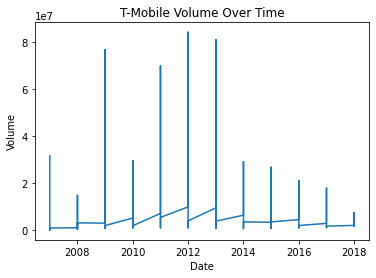

In [43]:
plt.plot(tmobile_split["Year"], tmobile_split["Volume"])
plt.title("T-Mobile Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

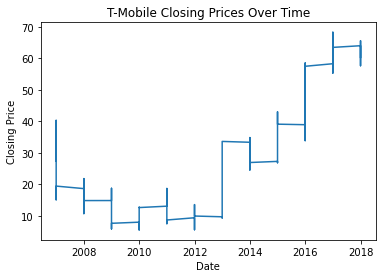

In [44]:
plt.plot(tmobile_split["Year"], tmobile_split["Close"])
plt.title("T-Mobile Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

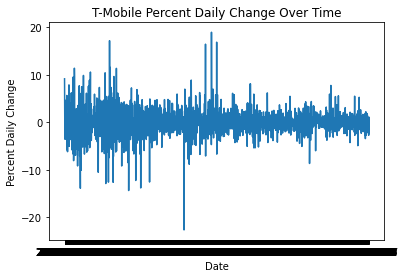

In [62]:
plt.plot(tmobile_data['Date'], tmobile_data['Percent Daily Change'])
plt.title("T-Mobile Percent Daily Change Over Time")
plt.xlabel("Date")
plt.ylabel("Percent Daily Change")
plt.show()

# Verizon

In [56]:
verizon_data = pd.read_csv("VZ.csv")
verizon_data.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,1983-11-21,70.62,70.75,65.62,70.25,627575.0,0.0,1.0,1.649837,1.652874,1.533026,1.641193,5020600.0
1,1983-11-22,70.25,71.25,69.87,70.00,333338.0,0.0,1.0,1.641193,1.664556,1.632316,1.635353,2666704.0
2,1983-11-23,70.00,70.25,69.25,69.62,143988.0,0.0,1.0,1.635353,1.641193,1.617831,1.626475,1151904.0
3,1983-11-25,69.62,69.75,68.87,68.87,221475.0,0.0,1.0,1.626475,1.629512,1.608954,1.608954,1771800.0
4,1983-11-28,68.50,68.50,66.75,67.00,295975.0,0.0,1.0,1.600310,1.600310,1.559426,1.565266,2367800.0


In [57]:
verizon_data['Daily Change'] = verizon_data['Close'] - verizon_data['Open']
verizon_data['Percent Daily Change'] = verizon_data['Daily Change'] / verizon_data['Open'] * 100
verizon_data.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Change,Percent Daily Change
0,1983-11-21,70.62,70.75,65.62,70.25,627575.0,0.0,1.0,1.649837,1.652874,1.533026,1.641193,5020600.0,-0.37,-0.523931
1,1983-11-22,70.25,71.25,69.87,70.00,333338.0,0.0,1.0,1.641193,1.664556,1.632316,1.635353,2666704.0,-0.25,-0.355872
2,1983-11-23,70.00,70.25,69.25,69.62,143988.0,0.0,1.0,1.635353,1.641193,1.617831,1.626475,1151904.0,-0.38,-0.542857
3,1983-11-25,69.62,69.75,68.87,68.87,221475.0,0.0,1.0,1.626475,1.629512,1.608954,1.608954,1771800.0,-0.75,-1.077277
4,1983-11-28,68.50,68.50,66.75,67.00,295975.0,0.0,1.0,1.600310,1.600310,1.559426,1.565266,2367800.0,-1.50,-2.189781


In [48]:
plt.scatter(verizon_data["Date"], verizon_data["Volume"])
plt.title("Verizon Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

KeyboardInterrupt: 

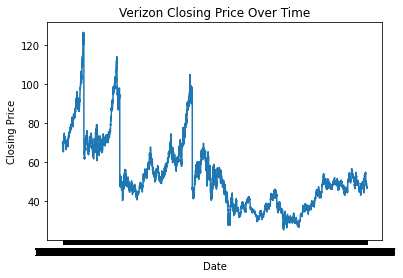

In [ ]:
plt.plot(verizon_data["Date"], verizon_data["Close"])
plt.title("Verizon Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

In [49]:
verizon_split = splitDates(verizon_data)
verizon_split

,Year,Month,Day,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Change,Percent Daily Change
0,1983,11,21,70.62,70.7500,65.620,70.25,627575.0,0.0,1.0,1.649837,1.652874,1.533026,1.641193,5020600.0,-0.37,-0.523931
1,1983,11,22,70.25,71.2500,69.870,70.00,333338.0,0.0,1.0,1.641193,1.664556,1.632316,1.635353,2666704.0,-0.25,-0.355872
2,1983,11,23,70.00,70.2500,69.250,69.62,143988.0,0.0,1.0,1.635353,1.641193,1.617831,1.626475,1151904.0,-0.38,-0.542857
3,1983,11,25,69.62,69.7500,68.870,68.87,221475.0,0.0,1.0,1.626475,1.629512,1.608954,1.608954,1771800.0,-0.75,-1.077277
4,1983,11,28,68.50,68.5000,66.750,67.00,295975.0,0.0,1.0,1.600310,1.600310,1.559426,1.565266,2367800.0,-1.50,-2.189781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8653,2018,3,21,47.69,47.9600,47.270,47.28,11039354.0,0.0,1.0,47.690000,47.960000,47.270000,47.280000,11039354.0,-0.41,-0.859719
8654,2018,3,22,47.10,47.5199,46.770,46.88,14210836.0,0.0,1.0,47.100000,47.519900,46.770000,46.880000,14210836.0,-0.22,-0.467091
8655,2018,3,23,47.06,47.4550,46.200,46.29,15829967.0,0.0,1.0,47.060000,47.455000,46.200000,46.290000,15829967.0,-0.77,-1.636209
8656,2018,3,26,46.78,47.1700,46.585,47.07,15253706.0,0.0,1.0,46.780000,47.170000,46.585000,47.070000,15253706.0,0.29,0.619923


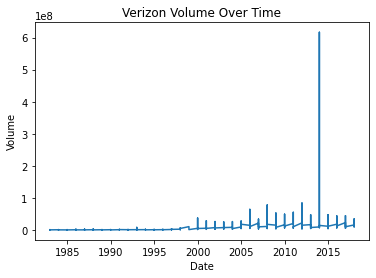

In [51]:
plt.plot(verizon_split['Year'], verizon_split['Volume'])
plt.title("Verizon Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

In [53]:
verizon_2014 = ndl.get("WIKI/VZ", start_date="2014-01-01", end_date="2018-12-31")
verizon_2014.to_csv("verizon_2014.csv")
verizon_2014 = pd.read_csv("verizon_2014.csv")
verizon_2014_split = splitDates(verizon_2014)
verizon_2014_split

,Year,Month,Day,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2014,1,2,49.08,49.2250,48.9500,49.00,9270200.0,0.00,1.0,41.425569,41.547955,41.315843,41.358045,9270200.0
1,2014,1,3,49.33,49.3300,48.2200,48.42,12022200.0,0.00,1.0,41.636579,41.636579,40.699693,40.868501,12022200.0
2,2014,1,6,48.77,49.0700,48.2023,48.69,16054800.0,0.00,1.0,41.163916,41.417128,40.684753,41.096392,16054800.0
3,2014,1,7,49.12,49.4000,48.5800,49.30,17594600.0,0.00,1.0,41.459330,41.695662,41.003548,41.611258,17594600.0
4,2014,1,8,48.69,49.0700,48.3600,48.50,13110700.0,0.53,1.0,41.545487,41.869728,41.263909,41.383367,13110700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,2018,3,21,47.69,47.9600,47.2700,47.28,11039354.0,0.00,1.0,47.690000,47.960000,47.270000,47.280000,11039354.0
1061,2018,3,22,47.10,47.5199,46.7700,46.88,14210836.0,0.00,1.0,47.100000,47.519900,46.770000,46.880000,14210836.0
1062,2018,3,23,47.06,47.4550,46.2000,46.29,15829967.0,0.00,1.0,47.060000,47.455000,46.200000,46.290000,15829967.0
1063,2018,3,26,46.78,47.1700,46.5850,47.07,15253706.0,0.00,1.0,46.780000,47.170000,46.585000,47.070000,15253706.0


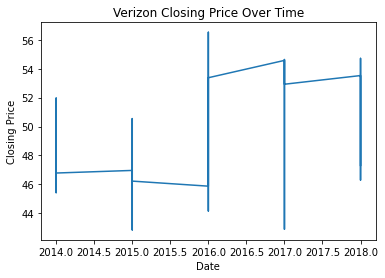

In [54]:
plt.plot(verizon_2014_split['Year'], verizon_2014_split['Close'])
plt.title("Verizon Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

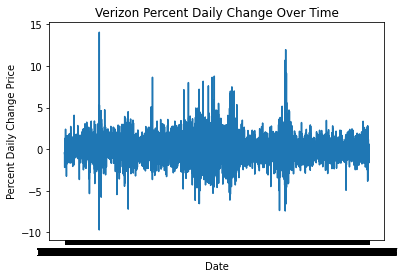

In [58]:
plt.plot(verizon_data['Date'], verizon_data['Percent Daily Change'])
plt.title("Verizon Percent Daily Change Over Time")
plt.xlabel("Date")
plt.ylabel("Percent Daily Change Price")
plt.show()

# The Great Recession

In [26]:
great_recession_t = ndl.get('WIKI/T', start_date="2007-01-01", end_date="2013-01-01")
great_recession_t = great_recession_t.reset_index()
great_recession_tm = ndl.get('WIKI/TMUS', start_date="2007-01-01", end_date="2013-01-01")
great_recession_tm = great_recession_tm.reset_index()
great_recession_vz = ndl.get('WIKI/VZ', start_date="2007-01-01", end_date="2013-01-01")
great_recession_vz = great_recession_vz.reset_index()

In [27]:
great_recession_t['Volume'] = np.log(great_recession_t['Volume'])

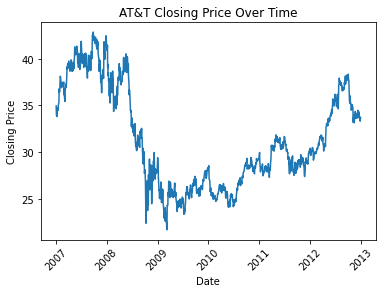

In [28]:
plt.plot(great_recession_t["Date"], great_recession_t['Close'])
plt.xticks(rotation=45)
plt.title("AT&T Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

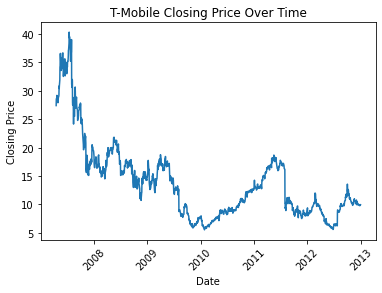

In [5]:
plt.plot(great_recession_tm["Date"], great_recession_tm['Close'])
plt.xticks(rotation=45)
plt.title("T-Mobile Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

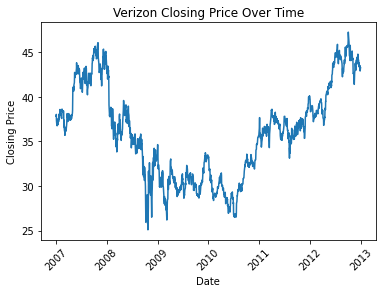

In [6]:
plt.plot(great_recession_vz["Date"], great_recession_vz['Close'])
plt.xticks(rotation=45)
plt.title("Verizon Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

# Comparative Analysis

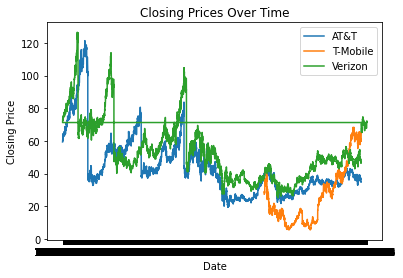

In [15]:
plt.plot(att_data['Date'], att_data['Close'], label="AT&T")
plt.plot(tmobile_data['Date'], tmobile_data['Close'], label="T-Mobile")
plt.plot(verizon_data['Date'], verizon_data['Close'], label="Verizon")
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend(loc="best")
plt.show()

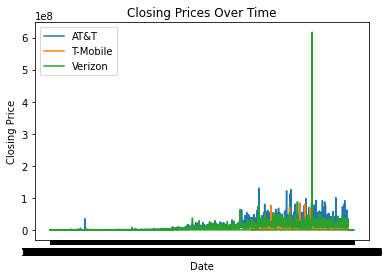

In [16]:
plt.plot(att_data['Date'], att_data['Volume'], label="AT&T")
plt.plot(tmobile_data['Date'], tmobile_data['Volume'], label="T-Mobile")
plt.plot(verizon_data['Date'], verizon_data['Volume'], label="Verizon")
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend(loc="best")
plt.show()